##  Факторный анализ: анализ главных компонент


In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline

from pandas.plotting import scatter_matrix

import seaborn as sns

import math
from sklearn import preprocessing



###   Предварительный анализ данных:  поведение самцов колюшки

Будем анализировать поведение самцов колюшки.
Не путайте с корюшкой.


#### Описание переменных <br>
LUNGES Количество нападений (удары) на модель самца.<br>
BITES Количество нападений (укусы) на модель самца.<br>
ZIGZAGS	Плавание зигзагом, которое является частью поведения, направленного на привлечение самок.<br>
NEST Действия, связанные с построением гнезда.<br>
SPINES Число раз, когда топорщился колючий верхний плавник.<br>
DNEST Суммарная длительность времени, проведенного за построением гнезда.<br>
BOUT Количество элементов поведения, характеризующих готовность к схватке.<br>

In [55]:
import os
os.chdir("C:/Users/USER/Documents/Python/_AD_Python_part_1_Lectures/AD_Python_1_15_factor_svd/")

In [56]:
df = pd.read_csv('stickleback.csv', sep=';', decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#  Убираем неинформативные переменные

df = df.iloc[:, 0:7]

df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [58]:
df.shape

(54, 7)

In [59]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [60]:
df.corr()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
LUNGES,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
BITES,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
ZIGZAGS,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
NEST,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
SPINES,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
DNEST,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
BOUT,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


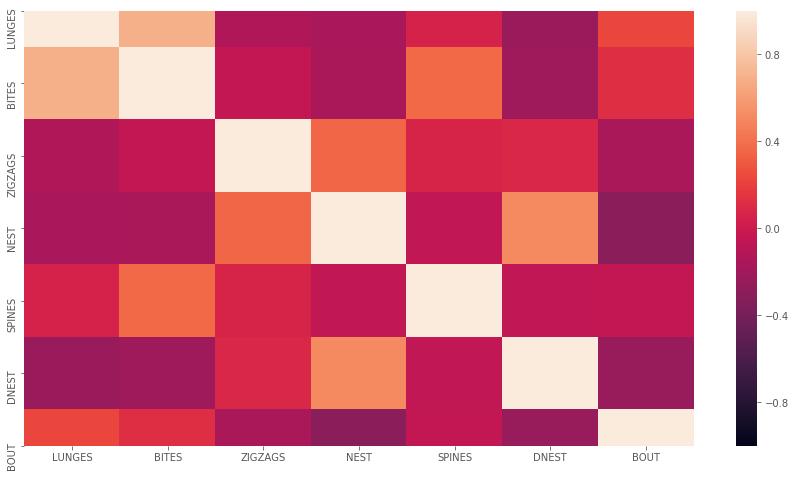

In [61]:
#  https://seaborn.pydata.org/generated/seaborn.heatmap.html
#  Верхняя и нижняя строки имеют половинную высоту.
#  Это известный баг, временное лекарство приведено ниже
#  https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot


plt.figure(figsize=(15,8))
c= df.corr()
sns.heatmap(c, vmin=-1, vmax=1)

(7.0, 0.0)

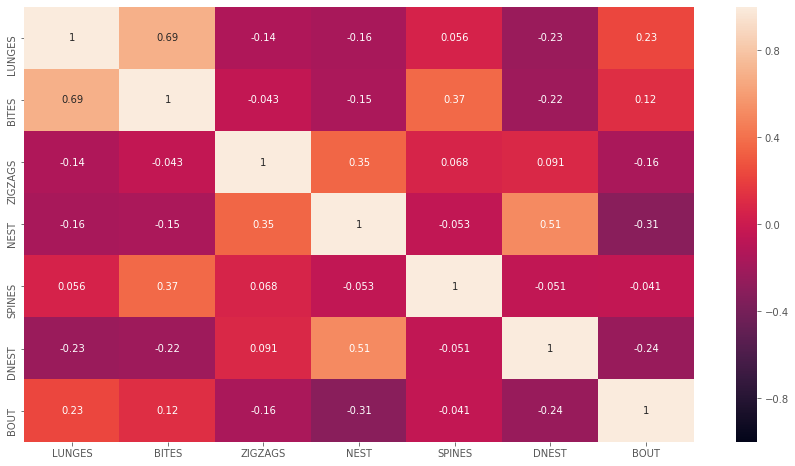

In [62]:
#  Исправленная версия.  Используем, пока не исправили баг
df_corr = df.corr()

plt.figure(figsize=(15,8))
ax = sns.heatmap(df_corr, annot=True, vmin=-1, vmax=1) # Внимание: "annot" а не "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B051FD408>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

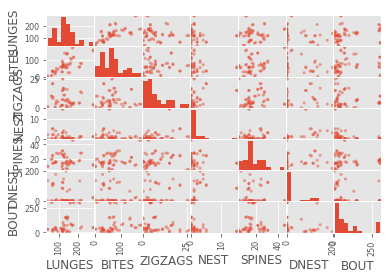

In [10]:
#  Матрица даиаграмм рассеивания
#  Версия 1
#  Снова как-то нескладно, раньше работало нормально...

plt.figure(figsize=(20,10))
scatter_matrix(df)

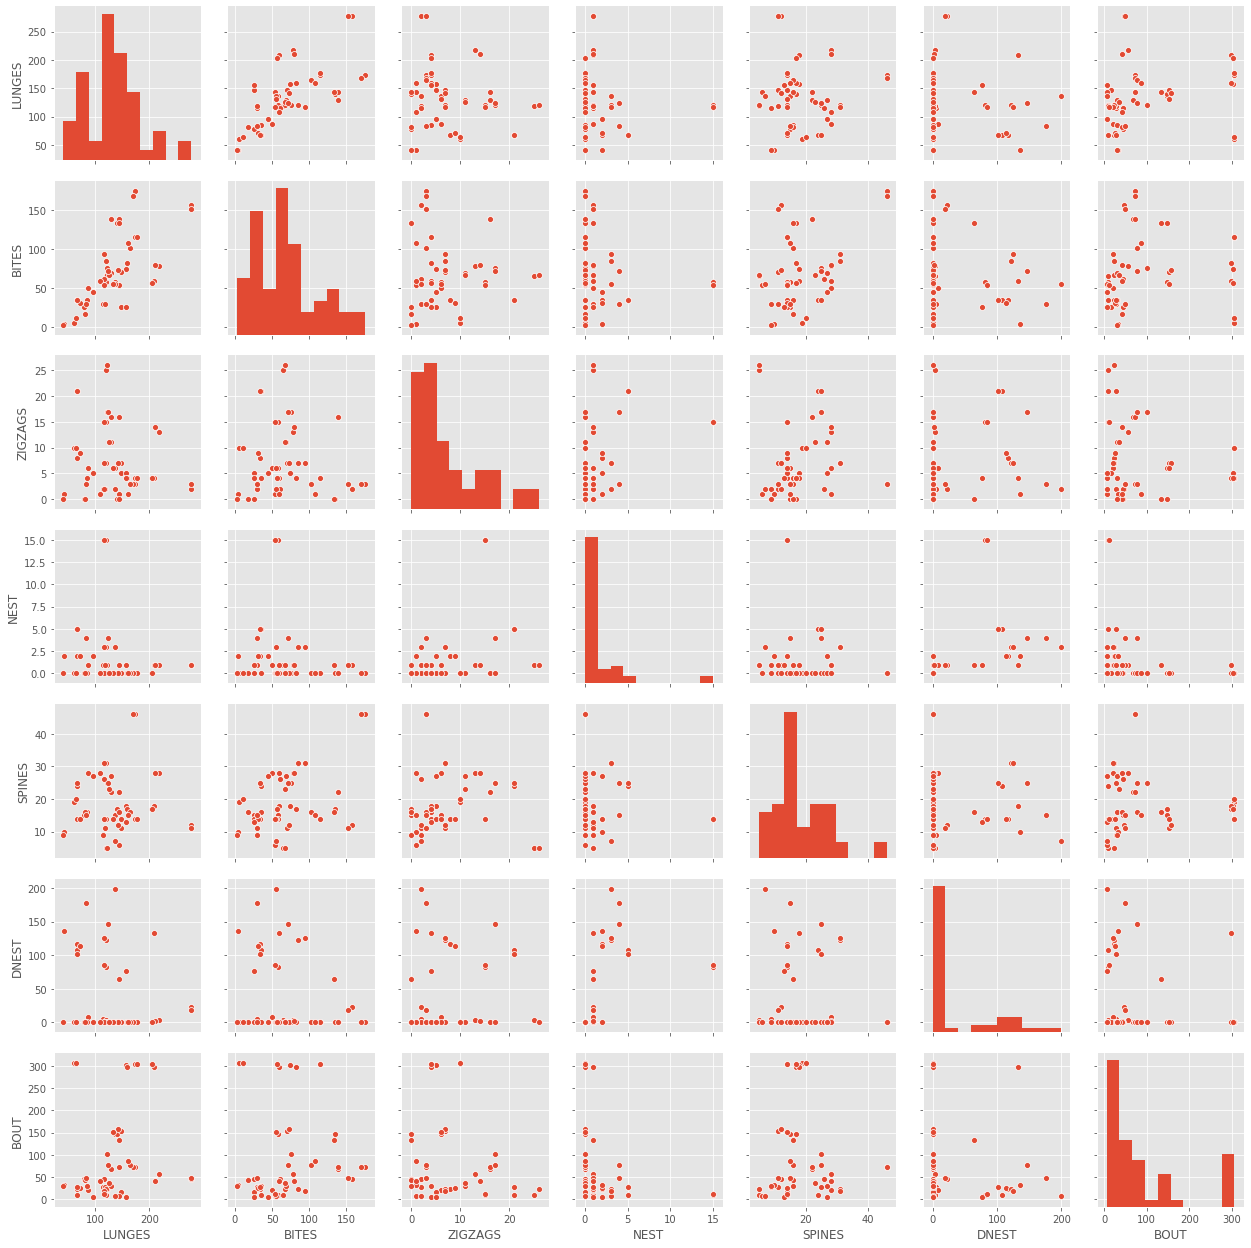

In [11]:
#  Матрица даиаграмм рассеивания
#  Версия 2

#   В пакете seaborn все нормально

sns.pairplot(df)

Вывод: распределения переменных существенно отличаются от нормальных, корреляции между переменными малы. <br>
Прогноз успеха факторного анализа: успех маловероятен. <br>
Но нас так просто не смутить. <br>

### Прежде чем анализировать, 
### попробуем оценить перспективность факторного анализа формальными методами.

####   Тест Bartlett'а  (Не рекомендуется применять)

In [12]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(85.17614839099757, 4.23744230751294e-10)

 #### Статистики  Kaiser-Meyer-Olkin

In [13]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [14]:
#  Перспективы факторного анализа
#  Сравниваем Global KMO с 0.5

print("Global KMO =", kmo_model)

Global KMO = 0.5267816347722193


Вывод: модель получится убогой (miserable, по Kaiser'у)<br>
Но нас это не остановит

In [15]:
#  Какие переменные стоит исключить из факторного анализа?
#  Вспомним критерий: kmo > 0.5

df_2 = pd.DataFrame(data=kmo_all, index = df.columns)
df_2.columns = ["kmo"]
df_2

,kmo
LUNGES,0.495177
BITES,0.485655
ZIGZAGS,0.536856
NEST,0.572718
SPINES,0.337686
DNEST,0.616393
BOUT,0.761309


Модель плохо описывает переменные <br>
LUNGES, BITES, SPINES

Но это не точно.



Метод главных компонент
=============

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
   


Cтандартизируем переменные. Из предварительного анализа видно, что это важно.

В команде PCA нет опции, выбирающей между корреляциями и ковариациями.<br>
Придется поработать самим.<br>
Напоминание: ковариация стандартизованных переменных совпадает с корреляцией.<br>

In [16]:
df_scaled = preprocessing.StandardScaler().fit_transform(df)

#   Другой способ стандартизации
#   df_scaled = preprocessing.scale(df)


In [17]:
#   Все хорошо:
df_scaled[0:5, :]

array([[-1.03750432, -1.02396939, -1.09743575, -0.47966932, -0.39690707,
        -0.61214787, -0.4532939 ],
       [ 0.09572432, -0.25696079, -0.19267956, -0.47966932, -0.39690707,
        -0.61214787,  0.60028766],
       [-0.32178097, -0.90775596, -0.79585035, -0.14327785, -1.09203081,
        -0.52280737, -0.61695706],
       [-0.04344411,  1.62569667,  1.31524742, -0.47966932,  0.41407062,
        -0.61214787, -0.20779917],
       [-0.22237495, -0.25696079,  1.16445472,  4.56620276, -0.51276103,
         0.85303633, -0.82153601]])

Реализация метода содержится в классе ```PCA``` 
библиотеки ```sklearn.decomposition```.



In [18]:
from sklearn.decomposition import PCA

In [19]:
#  Число главных компонент взято с запасом: строим все возможные компоненты.
#  Уточним "правильное" числом главных компонент на следующей итерации анализа
#  Если заранее решено, что компонент две, задаем
#  n_components=2

pca = PCA(n_components=7)

In [20]:
zzz = pca.fit(df_scaled)

In [21]:
#  Число столбцов в матрице данных

df_scaled.shape[1]

7

In [22]:
#  Посмотрим на собственные числа
#  чтобы определить число главных компонент
#  будем сравнивать их с 1 (критерий Кайзера) или 0.8 (критерий Jolliffe)

print(pca.explained_variance_ratio_ * df_scaled.shape[1])


[2.28814174 1.45424113 0.97911419 0.88607931 0.75323987 0.40480813
 0.23437562]


Вывод: надо оставить два фактора. (Или четыре)

###  Отступление. <br>

Реализуем PCA процедурами линейной алгебры из библиотеки numpy

In [23]:
#  Сосчитаем матрицу корреляций
#  Внимание!  Отступление от стандарта rowvar=False

zzz1 = np.corrcoef(df.values, rowvar=False)

In [24]:
zzz1

array([[ 1.        ,  0.68807674, -0.13933637, -0.16413256,  0.05556711,
        -0.22856752,  0.2333142 ],
       [ 0.68807674,  1.        , -0.04276105, -0.14888398,  0.37338178,
        -0.21756303,  0.11731577],
       [-0.13933637, -0.04276105,  1.        ,  0.35189426,  0.06781281,
         0.09131506, -0.16069256],
       [-0.16413256, -0.14888398,  0.35189426,  1.        , -0.05253774,
         0.51402827, -0.30587584],
       [ 0.05556711,  0.37338178,  0.06781281, -0.05253774,  1.        ,
        -0.05109914, -0.04148252],
       [-0.22856752, -0.21756303,  0.09131506,  0.51402827, -0.05109914,
         1.        , -0.24217747],
       [ 0.2333142 ,  0.11731577, -0.16069256, -0.30587584, -0.04148252,
        -0.24217747,  1.        ]])

In [25]:
zzz1.shape

(7, 7)

In [26]:
#  Избыточно сложный вариант, дает комплексные решения!
#  evals, evecs = np.linalg.eig(zzz1)

#  Применим более удобный вариант, чтобы, получить вещественные значения
evalsh, evecsh = np.linalg.eigh(zzz1)

In [27]:
evalsh

array([0.23437562, 0.40480813, 0.75323987, 0.88607931, 0.97911419,
       1.45424113, 2.28814174])

In [28]:
evecsh

array([[-0.63943618,  0.05536321, -0.1813046 ,  0.07619368, -0.48163265,
         0.31046609, -0.47012791],
       [ 0.70642405,  0.08045943, -0.08378925, -0.05001379, -0.12992711,
         0.50737164, -0.45897962],
       [-0.05270087,  0.34605259, -0.02177523,  0.78255836,  0.24381636,
         0.37893225,  0.24811772],
       [ 0.03746646, -0.72100117,  0.11356803,  0.09465088, -0.32733909,
         0.40026456,  0.43535559],
       [-0.28721966, -0.11564146,  0.41154609, -0.32376702,  0.62180282,
         0.46520814, -0.16394905],
       [-0.00498087,  0.57406155,  0.39063733, -0.36138125, -0.39879993,
         0.22423164,  0.42179779],
       [ 0.07338514, -0.08914314,  0.79042294,  0.36730814, -0.1971586 ,
        -0.2751091 , -0.33530269]])

In [29]:
#  отсортируем в порядке возрастания собственных чисел
#  idx = evalsh.argsort()   
#  evals = evalsh[idx] 
#  evecs = evecsh[:,idx]

In [30]:
#  отсортируем в порядке убывания собственных чисел
idx = evalsh.argsort()[::-1]   
evals = evalsh[idx] 
evecs = evecsh[:,idx]


In [31]:
#  Сравним с собственными числами, полученными в команде PCA
#  Решения должны совпасть
evals

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

In [32]:
#  Собственные векторы
evecs

array([[-0.47012791,  0.31046609, -0.48163265,  0.07619368, -0.1813046 ,
         0.05536321, -0.63943618],
       [-0.45897962,  0.50737164, -0.12992711, -0.05001379, -0.08378925,
         0.08045943,  0.70642405],
       [ 0.24811772,  0.37893225,  0.24381636,  0.78255836, -0.02177523,
         0.34605259, -0.05270087],
       [ 0.43535559,  0.40026456, -0.32733909,  0.09465088,  0.11356803,
        -0.72100117,  0.03746646],
       [-0.16394905,  0.46520814,  0.62180282, -0.32376702,  0.41154609,
        -0.11564146, -0.28721966],
       [ 0.42179779,  0.22423164, -0.39879993, -0.36138125,  0.39063733,
         0.57406155, -0.00498087],
       [-0.33530269, -0.2751091 , -0.1971586 ,  0.36730814,  0.79042294,
        -0.08914314,  0.07338514]])

Конец отступления о решении задачи напрямую, методами линейной алгебры

In [33]:
#  сумма собственных чисел равна числу переменных?
#  (если используем корреляционную матрицу)

sum(pca.explained_variance_ratio_ * df_scaled.shape[1])

7.000000000000002

In [34]:
#  доля общей дисперсии (total variance ), 
#  объясненная главной компонентой, в процентах
print ('Доля общей дисперсии: %s' % (pca.explained_variance_ratio_ * 100))



Доля общей дисперсии: [32.68773918 20.77487333 13.98734558 12.65827583 10.76056956  5.78297335
  3.34822318]


In [35]:
#  это НЕ singular values из SVD разложения
#  Не используем

pca.singular_values_

array([11.11573903,  8.86166018,  7.27132493,  6.91724531,  6.37769182,
        4.67542931,  3.55756709])

In [36]:
#  Должно совпасть с собственным числом

11.11573903**2 / (54-1)

2.3313142298691574

In [37]:
#  Напомним себе, чему равно собственное число

(pca.explained_variance_ratio_ * df_scaled.shape[1])[0]

2.2881417423754846

In [38]:
#  Попробуем угадать, где ошибка.
#  А если так?

11.11573903**2 / 54

2.2881417441308396

In [39]:
#  Разгадаем еще одну загадку разработчиков процедуры

pca.explained_variance_

array([2.33131423, 1.48167964, 0.99758804, 0.90279779, 0.76745194,
       0.41244602, 0.2387978 ])

In [40]:
#  Должна равняться 7

sum(pca.explained_variance_)

7.132075471698113

In [41]:
#  Попробуем угадать, где ошибка разработчиков.
#  А если так?

sum(pca.explained_variance_)*53/54

7.0

In [42]:
#  Попробуем угадать, где ошибка разработчиков.
#  А если так?

pca.explained_variance_ * 53/54

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

In [43]:
#  Сравним с правильным ответом
evals

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

In [44]:
(pca.explained_variance_ratio_ * df_scaled.shape[1])

array([2.28814174, 1.45424113, 0.97911419, 0.88607931, 0.75323987,
       0.40480813, 0.23437562])

Итак, 

pca.explained_variance_  и

pca.explained_variance_ratio_ * df_scaled.shape[1]

отличаются множителем 53/54

Почему мы должны это помнить? <br>
Нам не все равно, нам же надо определять число главных компонент.

Координаты самих компонент находятся в атрибуте ```components_```.

Сравниваем с собственными векторами из отступления. <br>
Совпали?

In [45]:
print (pca.components_)

[[-0.47012791 -0.45897962  0.24811772  0.43535559 -0.16394905  0.42179779
  -0.33530269]
 [ 0.31046609  0.50737164  0.37893225  0.40026456  0.46520814  0.22423164
  -0.2751091 ]
 [ 0.48163265  0.12992711 -0.24381636  0.32733909 -0.62180282  0.39879993
   0.1971586 ]
 [ 0.07619368 -0.05001379  0.78255836  0.09465088 -0.32376702 -0.36138125
   0.36730814]
 [-0.1813046  -0.08378925 -0.02177523  0.11356803  0.41154609  0.39063733
   0.79042294]
 [-0.05536321 -0.08045943 -0.34605259  0.72100117  0.11564146 -0.57406155
   0.08914314]
 [ 0.63943618 -0.70642405  0.05270087 -0.03746646  0.28721966  0.00498087
  -0.07338514]]


In [46]:
evecs


array([[-0.47012791,  0.31046609, -0.48163265,  0.07619368, -0.1813046 ,
         0.05536321, -0.63943618],
       [-0.45897962,  0.50737164, -0.12992711, -0.05001379, -0.08378925,
         0.08045943,  0.70642405],
       [ 0.24811772,  0.37893225,  0.24381636,  0.78255836, -0.02177523,
         0.34605259, -0.05270087],
       [ 0.43535559,  0.40026456, -0.32733909,  0.09465088,  0.11356803,
        -0.72100117,  0.03746646],
       [-0.16394905,  0.46520814,  0.62180282, -0.32376702,  0.41154609,
        -0.11564146, -0.28721966],
       [ 0.42179779,  0.22423164, -0.39879993, -0.36138125,  0.39063733,
         0.57406155, -0.00498087],
       [-0.33530269, -0.2751091 , -0.1971586 ,  0.36730814,  0.79042294,
        -0.08914314,  0.07338514]])

In [47]:
#  Значения факторов для каждой рыбки

zzz = pca.transform(df_scaled)

In [48]:
zzz

array([[ 0.43548142, -1.64669341, -0.60887645, -0.74882168, -0.51744353,
         0.43885949, -0.06370901],
       [-0.57810499, -0.85271451,  0.02370697,  0.39417577,  0.02590361,
         0.0952336 ,  0.08944927],
       [ 0.4734641 , -1.3749152 ,  0.22311247, -0.29959509, -1.00584751,
         0.38179701,  0.12794709],
       [-0.86464136,  1.23027304, -0.82995958,  0.91006936, -0.4444221 ,
        -0.54861392, -0.9577952 ],
       [ 3.21866694,  2.24827324,  1.56734852,  0.89534384,  0.02790868,
         2.30003519, -0.15312063],
       [-1.052399  ,  1.38648517, -0.38617423,  0.50259509, -0.38477919,
        -0.09364258,  1.33498237],
       [-2.61590674,  2.46582659, -1.54282384, -1.48438383,  0.5461967 ,
         0.339189  , -0.29722418],
       [ 1.04929916,  0.20661276, -0.24291867,  2.47143911, -1.52224488,
        -0.93864995, -0.33211246],
       [-2.13223362, -0.55315166,  1.01988416,  0.7731    ,  0.99810201,
         0.18002617, -0.52963089],
       [ 2.02009165, -0.4114

In [50]:
#  Корреляции факторов и исходных переменных

#  pd.DataFrame.corrwith(df_scaled, pd.DataFrame(zzz), axis=0, drop=False, method="pearson")

#  pd.DataFrame.corrwith(pd.DataFrame(df_scaled), pd.DataFrame(zzz), axis=0, drop=False)

print(pd.DataFrame.corrwith(df, pd.Series(zzz[:, 0]), axis=0, drop=False))
print(pd.DataFrame.corrwith(df, pd.Series(zzz[:, 1]), axis=0, drop=False))
print(pd.DataFrame.corrwith(df, pd.Series(zzz[:, 2]), axis=0, drop=False))


LUNGES    -0.711144
BITES     -0.694280
ZIGZAGS    0.375318
NEST       0.658545
SPINES    -0.247999
DNEST      0.638037
BOUT      -0.507199
dtype: float64
LUNGES     0.374397
BITES      0.611849
ZIGZAGS    0.456962
NEST       0.482687
SPINES     0.561003
DNEST      0.270405
BOUT      -0.331759
dtype: float64
LUNGES     0.476576
BITES      0.128563
ZIGZAGS   -0.241257
NEST       0.323903
SPINES    -0.615275
DNEST      0.394613
BOUT       0.195089
dtype: float64


Факторный анализ
=========


https://pypi.org/project/factor-analyzer/
 

Попробуем с помощью факторного анализа построить новые фичи, которые были бы более удобными в использовании с минимальной потерей информации.

Используем класс ```FactorAnalyzer``` из ```factor_analyzer```. 
Начнём с двух факторов.

In [ ]:
#   conda install -c ets factor_analyzer
#  !pip install factor_analyzer


In [63]:
#   from factor_analyzer import FactorAnalyzer, Rotator

from factor_analyzer import FactorAnalyzer

In [64]:
fa = FactorAnalyzer( n_factors = 2, rotation='varimax',  method = 'minres', 
                    impute = 'mean',  is_corr_matrix=  False)


In [65]:
fa.fit(df_scaled)

FactorAnalyzer(bounds=(0.005, 1), impute='mean', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [66]:
fa.loadings_

array([[ 6.23122753e-01, -2.42540383e-01],
       [ 1.00774110e+00, -1.28162872e-01],
       [ 1.96496548e-04,  3.55505921e-01],
       [-1.54538489e-02,  8.94196351e-01],
       [ 2.94314514e-01,  1.85737111e-02],
       [-1.55512141e-01,  5.36576222e-01],
       [ 9.94577275e-02, -3.84636241e-01]])

In [67]:
fa.loadings_.round(3)

array([[ 0.623, -0.243],
       [ 1.008, -0.128],
       [ 0.   ,  0.356],
       [-0.015,  0.894],
       [ 0.294,  0.019],
       [-0.156,  0.537],
       [ 0.099, -0.385]])

In [68]:
 fa.get_communalities()

array([0.4471078 , 1.03196785, 0.1263845 , 0.79982594, 0.08696602,
       0.31209807, 0.15783688])

In [69]:
fa.get_uniquenesses()

array([ 0.5528922 , -0.03196785,  0.8736155 ,  0.20017406,  0.91303398,
        0.68790193,  0.84216312])

In [70]:
fa.get_communalities() + fa.get_uniquenesses()

array([1., 1., 1., 1., 1., 1., 1.])

In [74]:
faLoadingsV = pd.DataFrame(np.vstack((fa.loadings_.T, fa.get_uniquenesses())),
                          index = ['Factor 1', 'Factor 2', 'Уникальность'], 
                           columns = list(df.columns.values))
faLoadingsV.round(3)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
Factor 1,0.623,1.008,0.000,-0.015,0.294,-0.156,0.099
Factor 2,-0.243,-0.128,0.356,0.894,0.019,0.537,-0.385
Уникальность,0.553,-0.032,0.874,0.200,0.913,0.688,0.842


In [75]:
#  Значения факторов для каждой рыбки

zzz = fa.transform(df_scaled)

In [76]:
zzz

array([[-1.05626664e+00, -4.14067146e-01],
       [-3.12891847e-01, -5.54500996e-01],
       [-9.14927570e-01, -2.17824732e-01],
       [ 1.81516828e+00, -1.79745422e-01],
       [ 4.13355350e-01,  3.84315135e+00],
       [-2.44390430e-01, -2.98967458e-01],
       [ 2.30693894e+00, -2.09218164e-01],
       [ 6.82863346e-02, -1.92381006e-02],
       [ 1.21303739e+00, -6.71320700e-01],
       [-6.85417953e-01,  4.34151435e-01],
       [-5.59897671e-01,  2.29131474e-03],
       [ 1.20658010e-01, -3.16211159e-02],
       [ 1.20260376e+00, -6.80735995e-01],
       [-1.30346324e+00, -5.57318588e-01],
       [-6.88039038e-01,  1.33940454e+00],
       [-8.26106843e-01, -3.67959448e-01],
       [-1.30230753e+00, -4.35703085e-01],
       [-9.56452356e-01, -2.26083574e-01],
       [ 1.99368208e+00, -3.24293087e-01],
       [ 1.76465944e+00, -3.91896447e-01],
       [-7.83514564e-01,  4.13290299e-01],
       [-3.56297110e-01, -5.06282498e-01],
       [ 1.76585449e+00, -2.22141917e-01],
       [ 2.

In [72]:
factors_2 = pd.DataFrame(fa.transform(df_scaled), columns = ['F1', 'F2'])

In [73]:
factors_2.head(5)

,F1,F2
0,-1.056267,-0.414067
1,-0.312892,-0.554501
2,-0.914928,-0.217825
3,1.815168,-0.179745
4,0.413355,3.843151


In [37]:
df_full = df.merge(factors_2, left_index=True, right_index=True)

df_full.head(5)
#  df_scaled.corr(fa.transform(df_scaled), "pearson")

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,F1,F2
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,-1.056267,-0.414067
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,-0.312892,-0.554501
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,-0.914928,-0.217825
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,1.815168,-0.179745
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,0.413355,3.843151


In [57]:
#  Как все должно бы было быть...
#  Но такой вариант не предусмотрен разработчиками

from scipy.stats import pearsonr

full_correlation = pearsonr(df_full[['F1', 'F2']], df_full[['LUNGES', 'BITES', 'ZIGZAGS', 'NEST', 'SPINES', 'DNEST', 'BOUT']])


ValueError: operands could not be broadcast together with shapes (2,) (7,) 

In [49]:
df_full.corr("pearson").iloc[0:7, [7, 8]]

,F1,F2
LUNGES,0.606068,-0.265584
BITES,0.980159,-0.140340
ZIGZAGS,0.000191,0.389283
NEST,-0.015031,0.979154
SPINES,0.286259,0.020338
DNEST,-0.151256,0.587557
BOUT,0.096736,-0.421181


In [54]:
#  Таблица должна совпадать с предыдущей...
pd.DataFrame(fa.loadings_)

,0,1
0,0.6231,-0.2425
1,1.0077,-0.1282
2,0.0002,0.3555
3,-0.0155,0.8942
4,0.2943,0.0186
5,-0.1555,0.5366
6,0.0995,-0.3846


In [50]:
#  Зачем выше pd.DataFrame?

fa.loadings_

array([[ 6.23122753e-01, -2.42540383e-01],
       [ 1.00774110e+00, -1.28162872e-01],
       [ 1.96496548e-04,  3.55505921e-01],
       [-1.54538489e-02,  8.94196351e-01],
       [ 2.94314514e-01,  1.85737111e-02],
       [-1.55512141e-01,  5.36576222e-01],
       [ 9.94577275e-02, -3.84636241e-01]])

In [77]:
#  Так округление работает

fa.loadings_.round(3)

array([[ 0.623, -0.243],
       [ 1.008, -0.128],
       [ 0.   ,  0.356],
       [-0.015,  0.894],
       [ 0.294,  0.019],
       [-0.156,  0.537],
       [ 0.099, -0.385]])

In [78]:
#  А так округление не работает
#  Кто подскажет, почему?

#  pd.options.display.float_format = '{:.4f}'.format
fa.loadings_.round(4)

array([[ 6.2310e-01, -2.4250e-01],
       [ 1.0077e+00, -1.2820e-01],
       [ 2.0000e-04,  3.5550e-01],
       [-1.5500e-02,  8.9420e-01],
       [ 2.9430e-01,  1.8600e-02],
       [-1.5550e-01,  5.3660e-01],
       [ 9.9500e-02, -3.8460e-01]])

Но почему именно два фактора?

А если попробовать 3 фактора?

In [14]:
faVarimax = FactorAnalyzer(n_factors=3, rotation = 'varimax')
faVarimax.fit(df_scaled) 

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=3, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [17]:
faLoadingsV = pd.DataFrame(np.vstack((faVarimax.loadings_.T,faVarimax.get_uniquenesses())),
                          index = ['Factor 1', 'Factor 2', 'Factor 3', 'Уникальность'], 
                           columns = list(df.columns.values))
faLoadingsV.round(3)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
Factor 1,-0.214,-0.110,0.342,0.989,0.026,0.501,-0.360
Factor 2,0.876,0.742,-0.076,0.058,0.057,-0.135,0.186
Factor 3,0.022,0.589,0.107,-0.141,0.564,-0.112,-0.090
Уникальность,0.186,0.090,0.866,-0.002,0.678,0.718,0.828


###  Новый пакет Факторного анализа factor_analyzer
Версия 2